In [1]:
from mcmr_crosstalk import MCMR_Crosstalk_Experiment
from selene_sim import DepolarizingErrorModel, Stim, Quest

In [7]:
probe_qubits = [q for q in range(6)]#range(56)]
focus_qubits = [0]
for focus_qubit in focus_qubits:
    probe_qubits.remove(focus_qubit)

seq_lengths = [1, 200, 400] #, 200, 400, 600]
seq_reps = 1


filename = f'exp_MCMR_Crosstalk_q{focus_qubits}.p'

exp = MCMR_Crosstalk_Experiment(focus_qubits, probe_qubits, seq_lengths, seq_reps, filename=filename)
exp.add_settings()

### Run local simulation using Selene

In [23]:
# Setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
)

In [24]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model = error_model, simulator=simulator)


Simulating ...
1/3 circuits complete
2/3 circuits complete
3/3 circuits complete


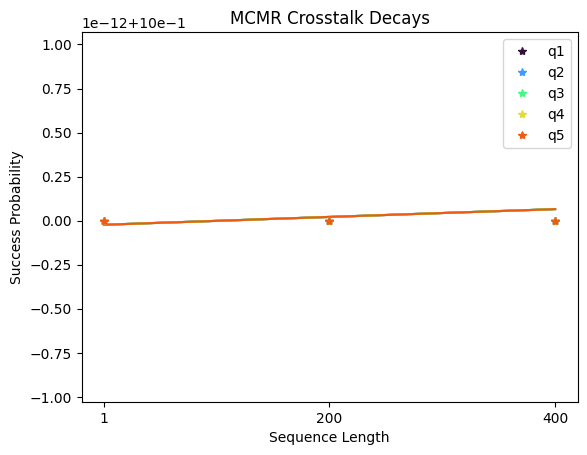

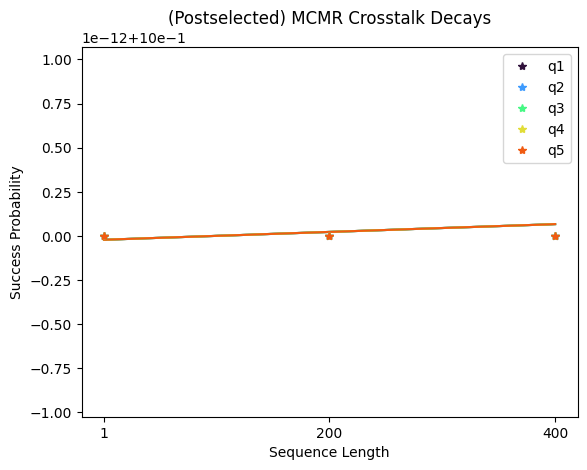

Crosstalk Infidelities 
--------------------------------------------------
 Probe #  Total   Comp.   Leak
--------------------------------------------------
1: -0.0, 0.0, -0.0
2: -0.0, 0.0, -0.0
3: -0.0, 0.0, -0.0
4: -0.0, 0.0, -0.0
5: -0.0, 0.0, -0.0
--------------------------------------------------
Average: -0.0 +/- 0.0, 0.0 +/- 0.0, -0.0+/- 0.0


In [25]:
exp.analyze_results()

In [26]:
# save experiment object to working directory

exp.save()